## Content

* [Part 1 : Understanding the Dataset](#P1)
* [Part 2 : Combining the csv files and the dataframes](#P2)
* [Part 3 : Data cleaning](#P3)
* [Part 4 : Business Questions](#P4) 

    * [Q1 : What was the best month for sales and how much was earned in that month?](#Q1)
    * [Q2 : Which city had the highest amount of sales?](#Q2)
    * [Q3 : What time should we display advertisements to maximize likelihood of customer's buying product?](#Q3)
    * [Q4 : Which products are most often sold together?](#Q4)
    * [Q5 : Which product was sold the most?](#Q5)



### Part 1 : Understanding the Dataset
<a id="P1"></a>

Annual sales of the electronics store has been broken down to months and we have twelve separate csv files in hand.

The data (in total) contains hundreds of thousands of electronics store purchases broken down by month, product type, address, etc.

Each individual file has the self-explanatory column names as below and the data type of each column has been mentioned in the table.


|Column Name|dtype|
|----------|----------|
|Order ID|object|
|Product|object|
|Quantity Ordered|object|
|Price Each|object|
|Order Date|object|
|Purchase Address|object|


Although some columns clearly represent numerical data (such as quantity or price), they have been stored as object data types. This indicates that we will need to convert some of the data types in the later stages of the study.

### Part 2 : Combining the csv files and the dataframes
<a id="P2"></a>

The data is available in twelve separate files (one single file per each month) and files are stored in `Sales Data` folder.

Before loading all those files and converting them to pandas dataframes, we should grab the file names from the relevant folder:

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
for folder,subfolder,file in os.walk("./Sales Data/"):
    month_list=file

In [4]:
month_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

We now have the list of the file names, and these files (representing twelve months sales data) should be concatenated in one single file showing the cumulated annual sales.

For this purpose, `concat` method will be used in a for loop (merge method will not be preferred as the column names in the files are all the same and combining will be based on axis zero). 

In order not to lose the track of the info which data is coming from which file (or month - as each individual file represent a different month of the year), a new column named `Sales Month` will be created in the same process.

In [5]:
df_year=pd.DataFrame()

for month in month_list:
    df_month = pd.read_csv("./Sales Data/"+month)
    df_month["Sales Month"]=month.split("_")[1] #creates a new column Sales Month
    df_year=pd.concat([df_year,df_month])

In [6]:
df_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
1,NaN,NaN,NaN,NaN,NaN,NaN,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April


The combined data will be saved as a separate csv file in case it's needed.

In [7]:
df_year.to_csv("combined_sales.csv", index=False)

In [8]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Sales Month       186850 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


### Part 3 : Data cleaning
<a id="P3"></a>

Before analyzing the combined dataframe, we should check for NaN or null values within and decide how to handle them.

To see how NaN values look like and where they are located in the dataframe;

In [9]:
#creates a dataframe consisting of rows which have at least one NaN value;
df_nun = df_year[df_year.isna().any(axis=1)]

In [10]:
df_nun

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Month
1,NaN,NaN,NaN,NaN,NaN,NaN,April
356,NaN,NaN,NaN,NaN,NaN,NaN,April
735,NaN,NaN,NaN,NaN,NaN,NaN,April
1433,NaN,NaN,NaN,NaN,NaN,NaN,April
1553,NaN,NaN,NaN,NaN,NaN,NaN,April
...,...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN,September
10274,NaN,NaN,NaN,NaN,NaN,NaN,September
10878,NaN,NaN,NaN,NaN,NaN,NaN,September
11384,NaN,NaN,NaN,NaN,NaN,NaN,September


It seems that there are some rows consisting of only NaN values (except the Sales Month column which was the additional column). It makes sense to drop all of those NaN rows as they do not provide any valuable info.

But, how can we be sure all of those 545 rows are full of NaN values? We can not check those rows one by one.

In [11]:
df_nun.isna().all(axis=0)

Order ID             True
Product              True
Quantity Ordered     True
Price Each           True
Order Date           True
Purchase Address     True
Sales Month         False
dtype: bool

As can be seen from the result, **all** of the original six columns are consisting of NaN values. So, those can now be dropped without any hesitation.

In [12]:
df_year.dropna(axis=0,inplace=True)

### Part 4 : Business Questions
<a id="P4"></a>


### Question 1 : What was the best month for sales and how much was earned in that month?
<a id="Q1"></a>

There are two ways to answer this.

First and easy way would be to use the `Sales Month` column which has been already created while concatenating the files.

Second way would be to use `Order Date` column - by the assumption that the sales has been realised during the month in which product was ordered. 
In order to do that, we would either need to convert `Order Date` column data type from object to datetime - or to use some sort of parsing to grab the month info from the string (such as from 04/12/19 09.27).

Whats more, in each cases, we would need to convert the data types of `Quantity Ordered` and `Price Each` to numerical ones and then create a new column (will be named as `Total Sales`) by multiplication of those two columns.

> First, we will try to reach the answer via `Sales Month` column;

To convert the objects to integers and floats within `Quantity Ordered` and `Price Each` columns; we apply:

    df_year["Quantity Ordered"] = df_year["Quantity Ordered"].astype("int32")

    df_year["Price Each"] = df_year["Price Each"].astype("float")

These raise the error as below;

    ValueError: invalid literal for int() with base 10: 'Quantity Ordered'


This error indicates that there is a string 'Quantity Ordered' within the dataframe and it should be the cause of the error. This string most probably can be found in Quantity Ordered column:

In [13]:
df_year[df_year["Quantity Ordered"]=="Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,April
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,April
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,April
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,April
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,April
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,September
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,September
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,September
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,September


It seems that there is kind of a "bug" within the dataframe (most probably occurred while being downloaded to excel files). 

So we should remove those rows as well:

In [14]:
df_year=df_year.loc[((df_year!="Quantity Ordered").all(axis=1)),:]

---
We now have a fully clean dataframe. 

Lets try to convert the objects to numeric values once again:

In [15]:
df_year["Quantity Ordered"] = pd.to_numeric(df_year["Quantity Ordered"])
df_year["Price Each"] = pd.to_numeric(df_year["Price Each"])

In [16]:
#the message above is negligible as it is a default warning when a copy of a slice from a dataframe is used.

---
To be able to answer the Question 1, we have to create a `Total Sales` column which is simply the multiplication of `Quantity Ordered` and `Price Each` columns: 

In [17]:
df_year["Total Sales"]=df_year["Quantity Ordered"]*df_year["Price Each"]

To see the best month for sales:

In [18]:
df_year.groupby("Sales Month").sum()["Total Sales"].sort_values(ascending=False).round(3)

Sales Month
December     4619297.12
October      3736884.05
April        3396059.11
November     3198909.23
May          3144584.80
March        2809063.30
July         2646899.69
June         2578293.30
August       2244412.31
February     2203481.24
September    2098816.70
January      1815335.12
Name: Total Sales, dtype: float64

**December** is the best month for sales. 

---
>Now, let's use `Order Date` column to answer the same question:

In [19]:
#converting the Order Date column type to datetime:

df_year_t = df_year.copy()

df_year_t["Order Date"] = pd.to_datetime(df_year_t["Order Date"], errors="coerce")

In [20]:
#Creating a separate `Month` column by using `dt` method.
df_year_t["Month"] = df_year_t["Order Date"].dt.month_name()

In [21]:
df_year_t.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Month,Total Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,April


In [22]:
df_year_t.groupby("Month").sum()["Total Sales"].sort_values(ascending=False).round(3)

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Total Sales, dtype: float64

**December** (12th month) has been proved to be the best month for sales again.

#### Note:
It is also important to note that, when two methods we've used are compared, there is a small discrepancy between the sum of sales amounts for each month.

This should indicate that some of the sales figures in the excel files have been incorrectly tagged.

In fact, it can be seen from the "Sales_April_2019.csv" file that there are a couple of records which belong to 01/05/2019 (May) for instance. This issue is valid for the other months as well. This needs to be addressed to relevant staff who created the excel files.

We will be using **`Month`** column for the rest of the analysis.

In [23]:
df_year_t.drop("Sales Month",axis=1,inplace=True)

---
Now, let's visualize the sales distribution by month:

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

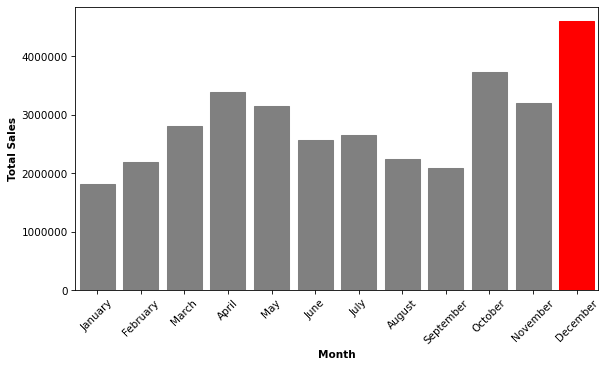

In [25]:
plt.figure(figsize=(9,5),dpi=75)
order=['January','February','March','April','May','June','July',
       'August','September','October', 'November','December']

g = sns.barplot(data=df_year_t, x="Month", y="Total Sales",ci=None, order=order, estimator=sum)

g.set_xlabel("Month", weight="bold")
g.set_ylabel("Total Sales", weight="bold")
g.set_xticklabels(order,rotation=45) #or : plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")

#highlighting the month with best sales (will be displyed in red color)
height=[]
for bar in g.patches:
    height.append(bar.get_height())
    
for bar in g.patches:   
    if bar.get_height()==max(height):
        bar.set_color("red")
    else:
        bar.set_color("grey")


### Question 2 : Which city had the highest amount of sales?
<a id="Q2"></a>

We can grab the city(state) name only from the `Purchase Address` column which has the format:

    Street, CityName, StateCode PostalCode

One thing to consider here is the possibility of duplicating city names in different states (such as Portland).
In order to avoid this, we should be getting the city name along with the state code, such as 

      Dallas TX

We can do that either by a customized function along with apply method or by str methods on columns. We will be also creating a new column called `City`.

In [26]:
df_year_t["City"]=df_year_t["Purchase Address"].str.split(",").str[1]+df_year_t["Purchase Address"].str.split(",").str[2].str[0:3]

In [27]:
#a quick look to the new dataframe with City column:
df_year_t.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles CA


Now we can answer the question by a groupby method - in the same sense we did for the months:

In [28]:
df_year_t.groupby("City").sum()["Total Sales"].sort_values(ascending=False).round(3)

City
 San Francisco CA    8262203.91
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Boston MA           3661642.01
 Atlanta GA          2795498.58
 Dallas TX           2767975.40
 Seattle WA          2747755.48
 Portland OR         1870732.34
 Austin TX           1819581.75
 Portland ME          449758.27
Name: Total Sales, dtype: float64

San Francisco has the highest amount of sales by far among other cities. Please do notice that there are two cities named "Portland" and that information would be lost if we had not combined the city name with the state code.  

---
Now, let's visualize the sales distribution by city (in the same logic we did for months):

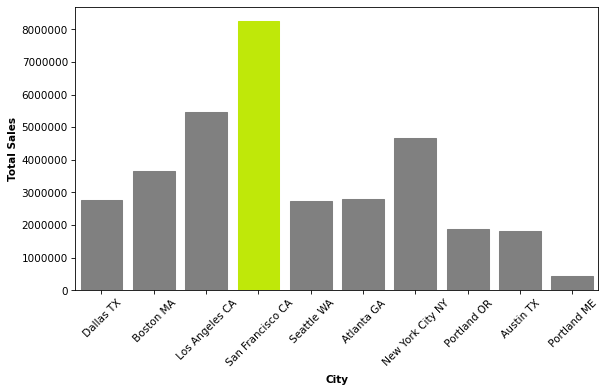

In [29]:
plt.figure(figsize=(9,5),dpi=75)

g = sns.barplot(data=df_year_t, x="City", y="Total Sales", ci=None, estimator=sum)

g.set_xlabel("City", weight='bold')
g.set_ylabel("Total Sales", weight="bold")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")

#highlighting the city with best sales (will be displyed in green color)
height=[]
for bar in g.patches:
    height.append(bar.get_height())
    
for bar in g.patches:   
    if bar.get_height()==max(height):
        bar.set_color("#bfe809")
    else:
        bar.set_color("grey")

### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product?
<a id="Q3"></a>

We may come up with some ideas only if we know about the distrubition of orders along the hours of the day. And we can grab this information from the `Order Date` column. Please note, we have already converted this column to datetime format and it is ready to be to worked on.

We can create a new column showing the the hour of the day and then we can analyze the sales based on it.

In [30]:
df_year_t["Hour"]=df_year_t["Order Date"].dt.strftime('%H:%M')

In [31]:
#a quick look to the new dataframe with City column:
df_year_t.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston MA,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,14:38


---
Now, let's visualize the sales distribution by hour:

<Figure size 3000x1400 with 0 Axes>

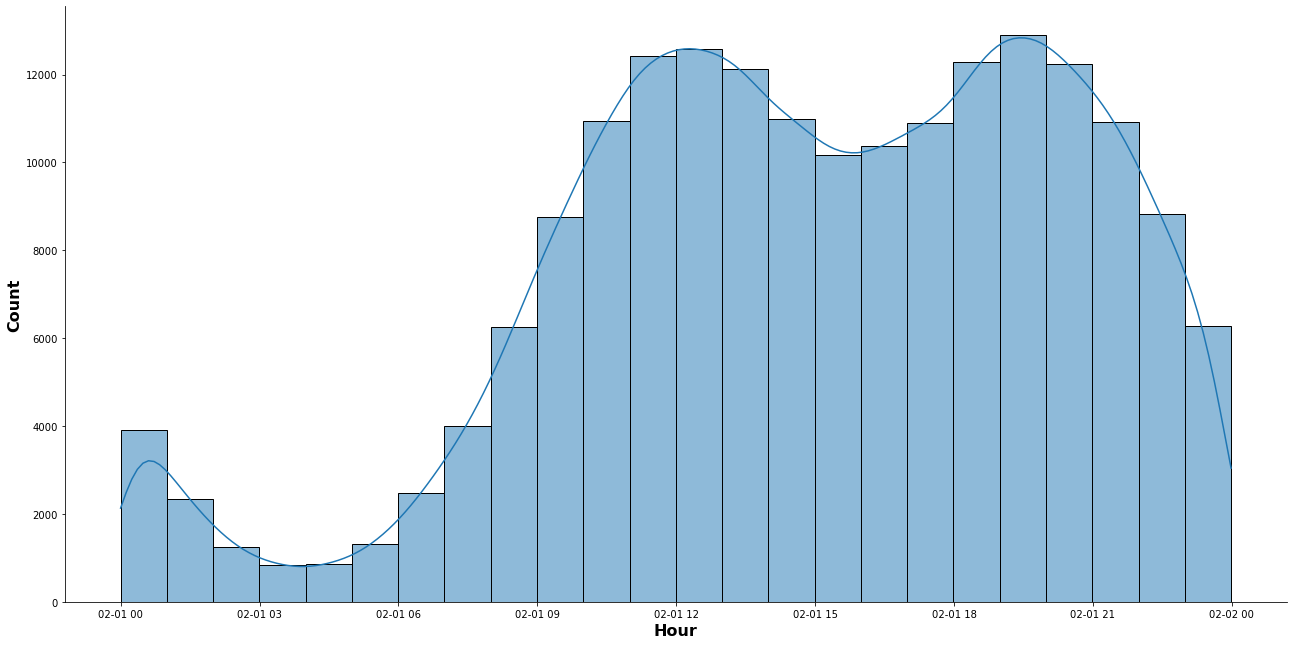

In [32]:
plt.figure(figsize=(15,7), dpi=200)
sns.displot(data=df_year_t,x=pd.to_datetime(df_year_t["Hour"]), kde=True, bins=24, height=9, aspect=2)
plt.xlabel("Hour",fontsize=16, weight="bold")
plt.ylabel("Count",fontsize=16, weight="bold");


According to the figure, it may make sense to display the ads before the peak times (before 11 am or before 19 pm) to boost the sales further. Having the ads in the bottom times (03 am in the morning) most probably will not have any effect.

### Question 4 : Which products are most often sold together?
<a id="Q4"></a>

In order to identify those "bundle"s, we should be able to pack those products together and then dive into the pack afterwards.

In the dataframe, each individual row represents a single product and we can only identify the products sold together via `Order ID` column which have same values. As long as the order id values are the same, we can be sure that the relevant products have been sold together.

So, we will create a new dataframe (df_dup) consisting of only duplicated order ids:

In [33]:
df_dup = df_year_t[df_year_t["Order ID"].duplicated(keep=False)] #that will keep all duplicated rows within the dataframe

In [34]:
#a quick look to the new dataframe consisting only from duplicated values:
df_dup.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles CA,14:38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,19:42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles CA,19:42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston MA,11:31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston MA,11:31


We'd be able to combine those individual products based on their order ids by a combination of groupby and `transform` methods:

In [35]:
df_dup["Bundled"] = df_dup.groupby("Order ID")["Product"].transform(lambda i : "&".join(i))

<ipython-input-35-b10a784b7a92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["Bundled"] = df_dup.groupby("Order ID")["Product"].transform(lambda i : "&".join(i))


In [36]:
#a quick look to the new dataframe with the new column "Bundled":
df_dup.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City,Hour,Bundled
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,14:38,Google Phone&Wired Headphones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles CA,14:38,Google Phone&Wired Headphones
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,19:42,Google Phone&USB-C Charging Cable
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles CA,19:42,Google Phone&USB-C Charging Cable
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston MA,11:31,Bose SoundSport Headphones&Bose SoundSport Hea...
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston MA,11:31,Bose SoundSport Headphones&Bose SoundSport Hea...


In [37]:
#as we get the bundled products available for each Order ID, we should drop the duplicated Order IDs now.

In [38]:
df_dup = df_dup[["Order ID","Bundled"]].drop_duplicates()

In [39]:
df_dup.head()

,Order ID,Bundled
3,176560,Google Phone&Wired Headphones
18,176574,Google Phone&USB-C Charging Cable
30,176585,Bose SoundSport Headphones&Bose SoundSport Hea...
32,176586,AAA Batteries (4-pack)&Google Phone
119,176672,Lightning Charging Cable&USB-C Charging Cable


Please note that some of the Bundled rows might have more than 2 products. In order to create a full list of combinations (of size two) we will be using `combinations` from itertools library and count them with the `Counter` from collections library: 

In [40]:
from itertools import combinations
from collections import Counter

c=Counter()

for row in df_dup["Bundled"]:
    row_list=sorted (row.split("&"))               #the list should be sorted - Counter will count the list as a different item
                                                   #if the order of the strings are different.
    c.update(Counter(combinations(row_list,2)))

In [41]:
#using most_common method for the Counter to display most ten frequently seen bundles
c.most_common(10)

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

### Question 5 : Which product was sold the most?
<a id="Q5"></a>

This is relatively an easier question and we can search for this answer within our original dataframe:

In [42]:
df_year_t.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston MA,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles CA,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles CA,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Los Angeles CA,09:27


In [43]:
df_year_t.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

The battery products seem to be the best selling items. What does that list tell us? Most probably, the products which have the least price are being sold the most. Lets try to find this our by graph:

<ipython-input-44-8769c228eb2c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation=80)


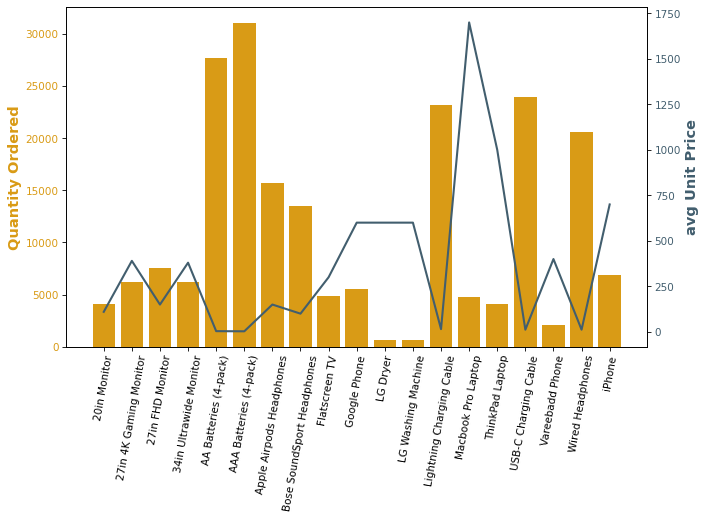

In [44]:
products = [p for p, df in df_year_t.groupby(["Product"])] #to get the same order in the dataframe via groupby
quantity = df_year_t.groupby(["Product"]).sum()["Quantity Ordered"]
prices = df_year_t.groupby(["Product"]).mean()["Price Each"]


fig, ax1 = plt.subplots(figsize=(10,6),dpi=75)

ax1.bar(products, quantity, color="#d99b16")
ax1.set_ylabel("Quantity Ordered", fontsize=14, color="#d99b16", weight="bold")
ax1.set_xticklabels(products,rotation=80)

for label in ax1.get_yticklabels():
    label.set_color("#d99b16")
    
ax2 = ax1.twinx() #adding a secondary y axis
ax2.plot(products, prices, lw=2, color="#425e6e")
ax2.set_ylabel("avg Unit Price", fontsize=14, color="#425e6e", weight="bold")

for label in ax2.get_yticklabels():
    label.set_color("#425e6e")

As expected, the products with the lowest unit prices are being sold the most.